In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler 


In [65]:
df=pd.read_csv("D:\\Downloads\\CAR DETAILS FROM CAR DEKHO.csv")

In [45]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


## Data Exploration and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


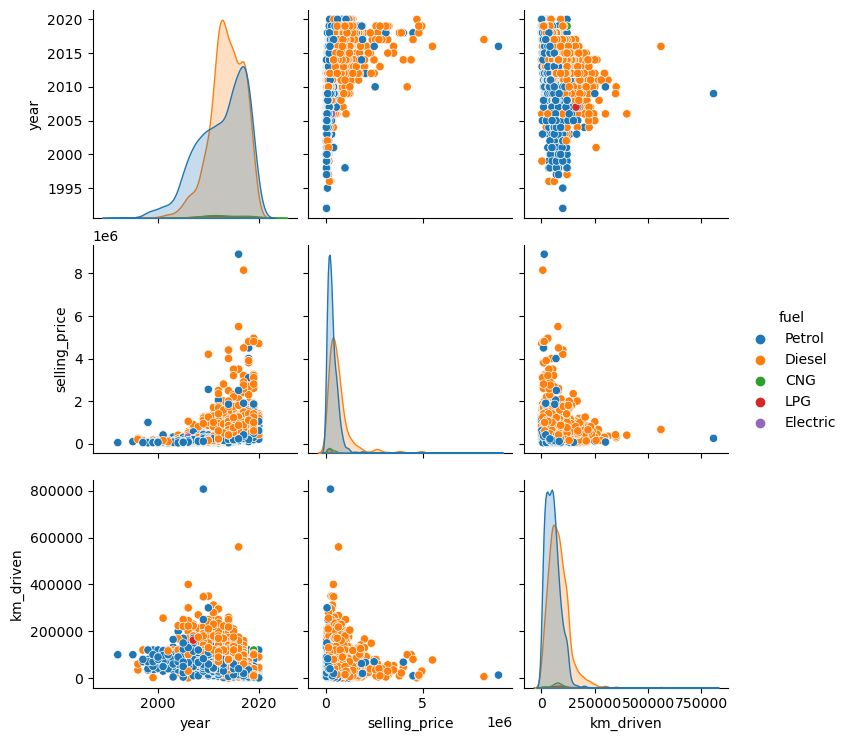

In [24]:
sns.pairplot(df,hue='fuel')

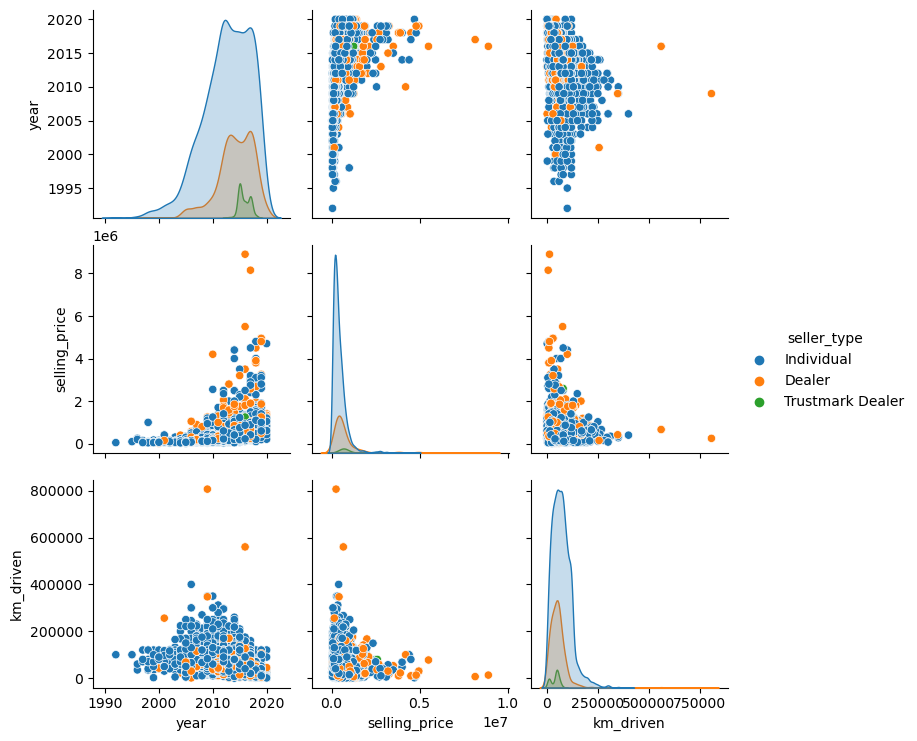

In [20]:
sns.pairplot(df,hue='seller_type')

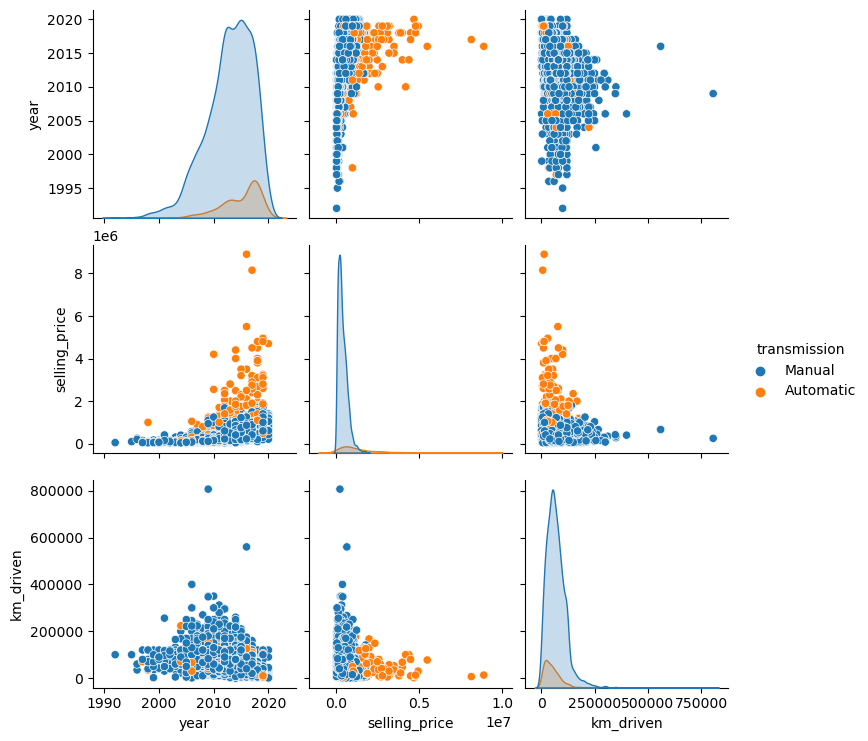

In [21]:
sns.pairplot(df,hue='transmission')

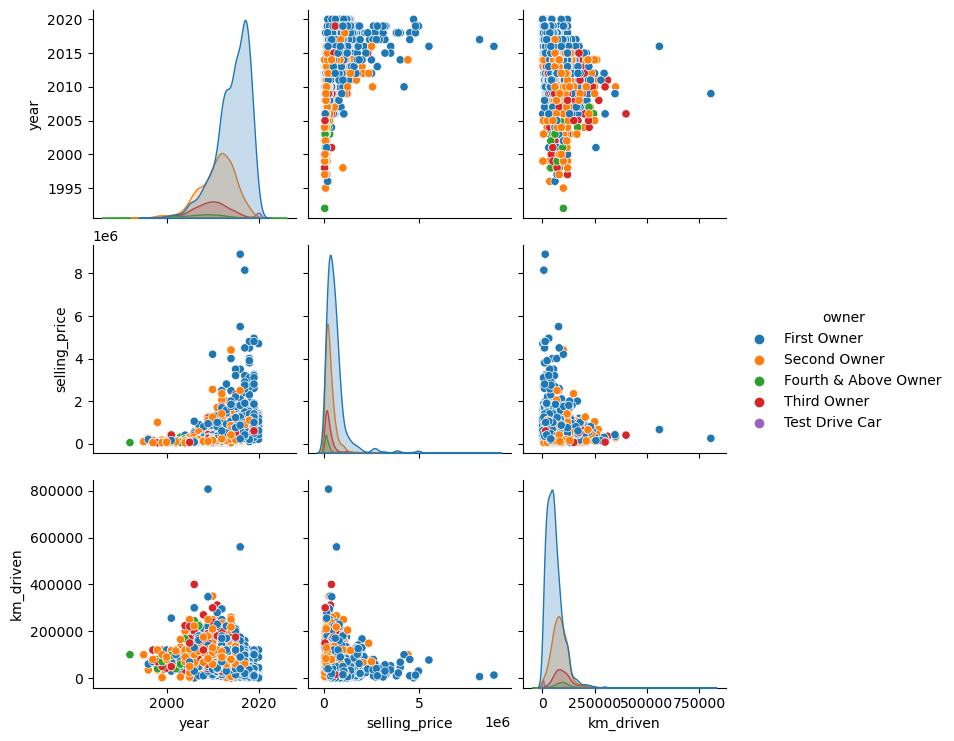

In [22]:
sns.pairplot(df,hue='owner')

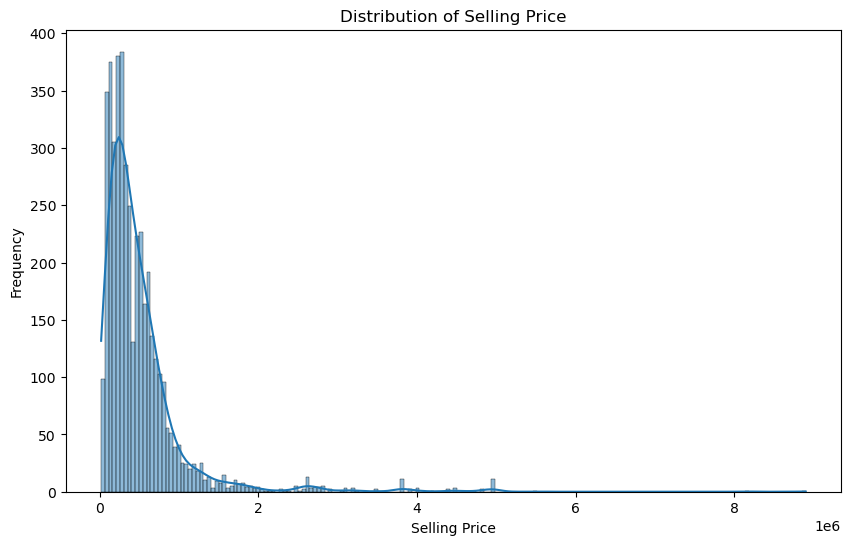

In [28]:
# Histogram of selling price
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

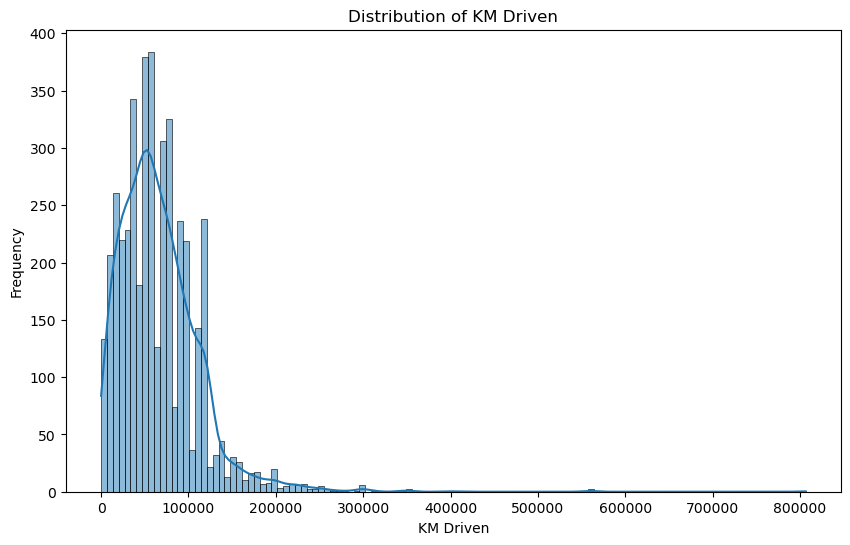

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['km_driven'], kde=True)
plt.title('Distribution of KM Driven')
plt.xlabel('KM Driven')
plt.ylabel('Frequency')
plt.show()

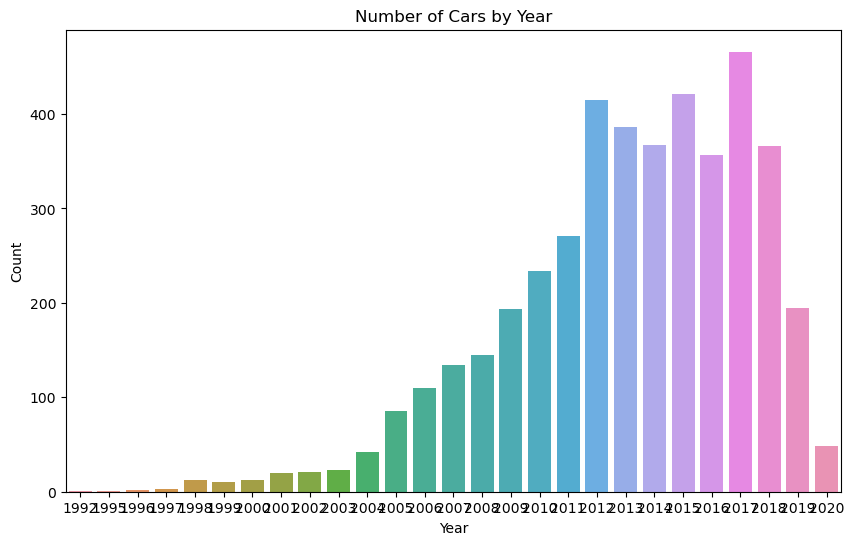

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df)
plt.title('Number of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

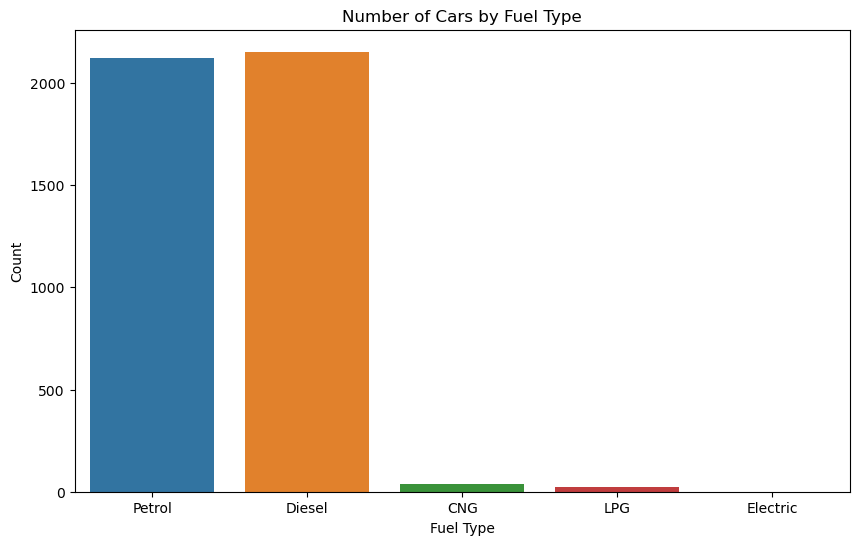

In [46]:
# Countplot of fuel type
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel', data=df)
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

#### Dropping the rows with electric cars becuase there is only 1 row in the dataset which will drop a whole column when encoded

In [66]:
electric_cars_df = df[df['fuel'] == 'Electric']

# Display the filtered DataFrame
print(electric_cars_df)

                     name  year  selling_price  km_driven      fuel  \
4145  Toyota Camry Hybrid  2006         310000      62000  Electric   

     seller_type transmission         owner  
4145      Dealer    Automatic  Second Owner  


In [67]:
dff=df.drop(4145)

In [68]:
dff

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [96]:
dff['name'].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1490, dtype: int64

#### Splitting the name column because there are multiple manufacturers and the price can also depend on them 

In [101]:
make = dff["name"].str.split(" ", expand = True)
dff["Manufacturer"] = make[0]

#### clearly defining year through datetime so it isn't just catered as a number

In [108]:
curr_time = datetime.datetime.now()
dff['year'] = dff['year'].apply(lambda x : curr_time.year - x)

In [115]:
dff['Manufacturer'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            205
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: Manufacturer, dtype: int64

### Encoding categorical variables and also finding the correlation with selling price

C:\Users\ammar\AppData\Local\Temp\ipykernel_15856\3996732914.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded.corr()


selling_price                   1.000000
year                            0.413932
Manufacturer_BMW                0.401855
Manufacturer_Mercedes-Benz      0.354213
Manufacturer_Audi               0.292169
fuel_Diesel                     0.282906
Manufacturer_Land               0.182329
Manufacturer_Toyota             0.162887
seller_type_Trustmark Dealer    0.110165
Manufacturer_Volvo              0.107744
Manufacturer_Jaguar             0.100661
Manufacturer_MG                 0.049676
owner_Test Drive Car            0.048795
Manufacturer_Jeep               0.046640
Manufacturer_Mahindra           0.043760
Manufacturer_Ford               0.027941
Manufacturer_Isuzu              0.026134
Manufacturer_Mitsubishi         0.021600
Manufacturer_Kia                0.020885
Manufacturer_Honda              0.014582
Manufacturer_Skoda             -0.003088
Manufacturer_Force             -0.004151
Manufacturer_Volkswagen        -0.009107
Manufacturer_Nissan            -0.011470
Manufacturer_Dae

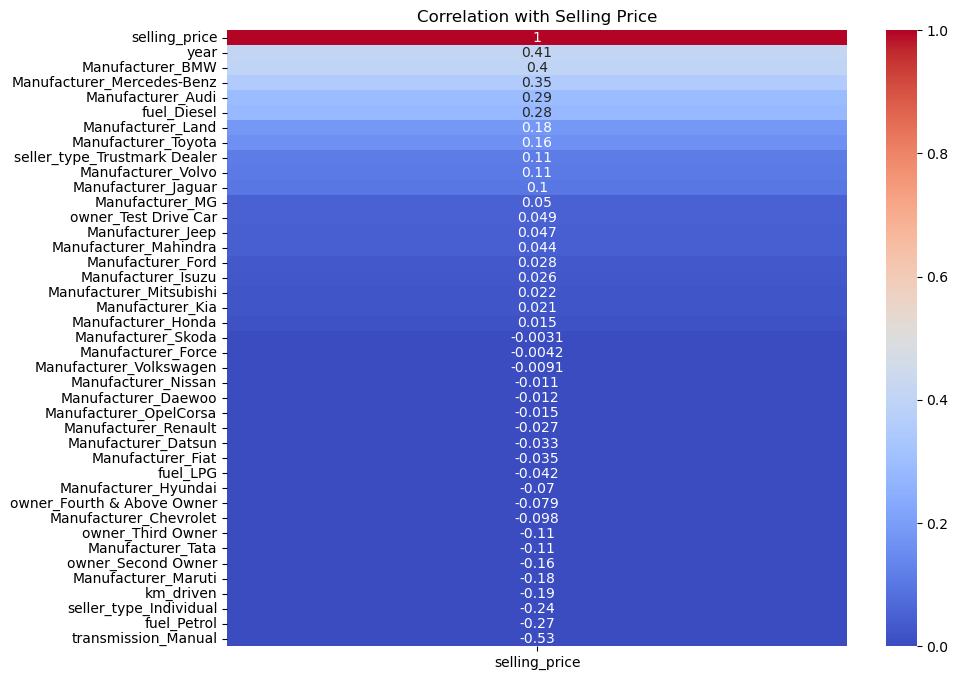

In [116]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(dff, columns=['fuel', 'seller_type', 'transmission', 'owner','Manufacturer'], drop_first=True)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Extract the correlations with 'selling_price'
selling_price_corr = corr_matrix['selling_price'].sort_values(ascending=False)

# Display the correlation values with 'selling_price'
print(selling_price_corr)

# Plot the correlation heatmap for selling price correlations
plt.figure(figsize=(10, 8))
sns.heatmap(selling_price_corr.to_frame(), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation with Selling Price')
plt.show()

In [119]:
X = df_encoded.drop(['selling_price', 'name'], axis=1)
y = df_encoded['selling_price']

#### scaling the values 

In [121]:
standardScaler = StandardScaler()
standardScaler.fit(X)
X = standardScaler.transform(X)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Training, validating & evaluating the model

In [123]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Scorers for MAE, MSE, and R2
scorers = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# Evaluate models using cross-validation
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = {}
    for scorer_name, scorer in scorers.items():
        scores = cross_val_score(model, X, y, cv=kf, scoring=scorer)
        results[model_name][scorer_name] = scores
        print(f"{model_name} {scorer_name}: {scores.mean()}")

Evaluating Random Forest...
Random Forest MAE: -119849.7629622956
Random Forest MSE: -66890587021.204346
Random Forest R2: 0.8073011254419621
Evaluating Gradient Boosting...
Gradient Boosting MAE: -143538.66621768993
Gradient Boosting MSE: -69362132299.39148
Gradient Boosting R2: 0.7973171877391889


In [124]:
results_df = pd.DataFrame(results)
print(results_df)

                                         Random Forest  \
MAE  [-110507.25879288783, -111587.54401830437, -13...   
MSE  [-32736044469.34653, -51136065367.63973, -1173...   
R2   [0.8381114471103613, 0.8537621702610545, 0.740...   

                                     Gradient Boosting  
MAE  [-142436.63490686912, -140581.55303809347, -15...  
MSE  [-44475455077.337555, -54031988080.643234, -11...  
R2   [0.781707183766896, 0.8361525975343171, 0.7485...  


# Tuning the hyperparameters of the selected models for better performance

In [125]:
# Define the parameter grid for Grid Search and Random Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [128]:
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Initialize the scorers
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Grid Search CV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring=scorer, n_jobs=-1)
grid_search_rf.fit(X, y)

# Grid Search CV for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring=scorer, n_jobs=-1)
grid_search_gb.fit(X, y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [129]:
# Random Search CV for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring=scorer, random_state=42, n_jobs=-1)
random_search_rf.fit(X, y)

# Random Search CV for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_grid_gb, n_iter=10, cv=5, scoring=scorer, random_state=42, n_jobs=-1)
random_search_gb.fit(X, y)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [140]:
# Best R2 for Random Forest (Grid Search)
best_rf_grid = grid_search_rf.best_estimator_
r2_rf_grid = r2_score(y, best_rf_grid.predict(X))
print("Best R2 for Random Forest (Grid Search):", r2_rf_grid)

# Best R2 for Gradient Boosting (Grid Search)
best_gb_grid = grid_search_gb.best_estimator_
r2_gb_grid = r2_score(y, best_gb_grid.predict(X))
print("Best R2 for Gradient Boosting (Grid Search):", r2_gb_grid)


Best R2 for Random Forest (Grid Search): 0.9668426675773176
Best R2 for Gradient Boosting (Grid Search): 0.9688056458158799


In [142]:
# Best R2 for Random Forest (Random Search)
best_rf_random = random_search_rf.best_estimator_
r2_rf_random = r2_score(y, best_rf_random.predict(X))
print("Best R2 for Random Forest (Random Search):", r2_rf_random)

# Best R2 for Gradient Boosting (Random Search)
best_gb_random = random_search_gb.best_estimator_
r2_gb_random = r2_score(y, best_gb_random.predict(X))
print("Best R2 for Gradient Boosting (Random Search):", r2_gb_random)


Best R2 for Random Forest (Random Search): 0.9416108247119354
Best R2 for Gradient Boosting (Random Search): 0.9688056458158799
